In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

In [11]:
usted_esta_aqui = os.getcwd()

In [12]:
origen = os.path.join(usted_esta_aqui)

In [13]:
os.chdir(origen)

In [14]:
ruta = os.path.join('data', 'raw', 'DF.csv')

In [15]:
df = pd.read_csv(ruta)

In [16]:
df.head()

,TITULO,AÑO,DURACION (min),GENERO,DIRECCION,GUION,PROTAGONISTA,PAIS,NOTA,VOTOS
0,(500) días juntos,2009,96,Romance,Marc Webb,Marc Webb,Joseph Gordon-Levitt,Estados Unidos,6.9,62814
1,"...Y si no, nos enfadamos",1974,92,Comedia,Marcello Fondato,Marcello Fondato,Terence Hill,Italia,5.9,5238
2,10 razones para odiarte,1999,97,Comedia,Gil Junger,Gil Junger,Heath Ledger,Estados Unidos,5.9,21667
3,10.000 KM,2014,98,Romance,Carlos Marqués-Marcet,Carlos Marqués-Marcet,Natalia Tena,España,6.4,10015
4,100 metros,2016,108,Drama,Marcel Barrena,Marcel Barrena,Dani Rovira,España,6.6,8968


### LIMPIEZA DE DATOS

Elimino las columnas que no voy a usar

In [4]:
df = df.drop(['TITULO', 'GUION'], axis=1)

Outliers

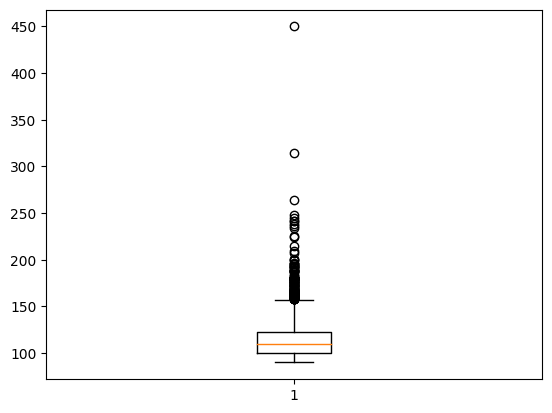

In [5]:
plt.boxplot(df['DURACION (min)']);

In [6]:
df = df[df['DURACION (min)'] <= 200]

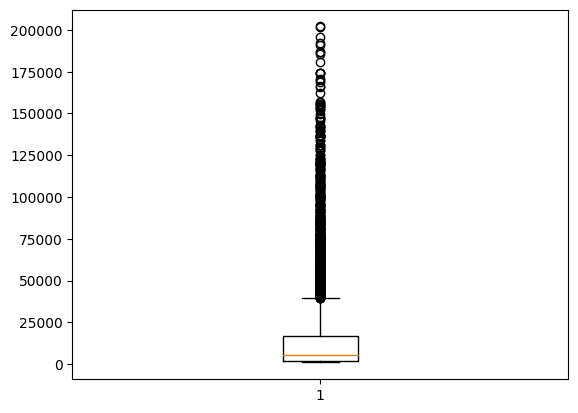

In [7]:
plt.boxplot(df['VOTOS']);

In [8]:
df = df[df['VOTOS'] <= 125000]

### FEATURE ENGINEERING

*Tras varias pruebas, he optado por clasificar los valores para cada una de las variables que tengo con respecto a la nota.
Primero, calculo la nota media para cada uno de los valores. 
Posteriormente, agrupo los valores en un rango del 0 al 9 con respecto a la media generada anteriormente.
La idea es hacer un filtrado, por gustos, siendo los que se encuentran en los valores más cercanos al 9, los que prefiere el usuario.*

Calculo la nota media para cada una de las variables

In [9]:
columnas = ['AÑO', 'DURACION (min)', 'GENERO', 'DIRECCION', 'PROTAGONISTA', 'PAIS', 'VOTOS']

In [10]:
for columna in columnas:
        media_por_valor = df.groupby(columna)['NOTA'].mean().round(2)
        nueva_columna = 'NOTA_' + columna
        df[nueva_columna] = df[columna].map(media_por_valor)

Clasifico los valores con respecto a la nota media

1. Año

In [11]:
df['NOTA_AÑO'].max()

6.99

In [12]:
df['NOTA_AÑO'].min()

6.34

In [13]:
bins = [6.34, 6.405, 6.47, 6.535, 6.6, 6.665, 6.73, 6.795, 6.86, 6.925, 7]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
df['AÑO_RANKING'] = pd.cut(df['NOTA_AÑO'], bins=bins, labels=labels, right=False).astype(int)

2. Duración

In [14]:
df['NOTA_DURACION (min)'].max()

7.95

In [15]:
df['NOTA_DURACION (min)'].min()

6.2

In [16]:
bins = [6.2, 6.375, 6.55, 6.725, 6.9, 7.075, 7.25, 7.425, 7.6, 7.775, 8]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
df['DURACION_RANKING'] = pd.cut(df['NOTA_DURACION (min)'], bins=bins, labels=labels, right=False).astype(int)

3. Género

In [17]:
df['NOTA_GENERO'].max()

6.75

In [18]:
df['NOTA_GENERO'].min()

5.97

In [19]:
bins = [5.97, 6.048, 6.126, 6.204, 6.282, 6.36, 6.438, 6.516, 6.594, 6.672, 7]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
df['GENERO_RANKING'] = pd.cut(df['NOTA_GENERO'], bins=bins, labels=labels, right=False).astype(int)

4. Dirección

In [20]:
df['NOTA_DIRECCION'].max()

8.1

In [21]:
df['NOTA_DIRECCION'].min()

5.8

In [22]:
bins = [5.8, 6.03, 6.26, 6.49, 6.72, 6.95, 7.18, 7.41, 7.64, 7.87, 9]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
df['DIRECCION_RANKING'] = pd.cut(df['NOTA_DIRECCION'], bins=bins, labels=labels, right=False).astype(int)

5. Protagonista

In [23]:
df['NOTA_PROTAGONISTA'].max()

8.4

In [24]:
df['NOTA_PROTAGONISTA'].min()

5.8

In [25]:
bins = [5.8, 6.06, 6.32, 6.58, 6.84, 7.1, 7.36, 7.62, 7.88, 8.14, 9]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
df['PROTAGONISTA_RANKING'] = pd.cut(df['NOTA_PROTAGONISTA'], bins=bins, labels=labels, right=False).astype(int)

6. País

In [26]:
df['NOTA_PAIS'].max()

7.74

In [27]:
df['NOTA_PAIS'].min()

5.9

In [28]:
bins = [5.9, 6.084, 6.268, 6.452, 6.636, 6.82, 7.004, 7.188, 7.372, 7.556, 8]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
df['PAIS_RANKING'] = pd.cut(df['NOTA_PAIS'], bins=bins, labels=labels, right=False).astype(int)

7. Votos

In [29]:
df['NOTA_VOTOS'].max()

8.5

In [30]:
df['NOTA_VOTOS'].min()

5.8

In [31]:
bins = [5.8, 6.07, 6.34, 6.61, 6.88, 7.15, 7.42, 7.69, 7.96, 8.23, 9]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
df['VOTOS_RANKING'] = pd.cut(df['NOTA_VOTOS'], bins=bins, labels=labels, right=False).astype(int)

In [32]:
df.head()

,AÑO,DURACION (min),GENERO,DIRECCION,PROTAGONISTA,PAIS,NOTA,VOTOS,NOTA_AÑO,NOTA_DURACION (min),...,NOTA_PROTAGONISTA,NOTA_PAIS,NOTA_VOTOS,AÑO_RANKING,DURACION_RANKING,GENERO_RANKING,DIRECCION_RANKING,PROTAGONISTA_RANKING,PAIS_RANKING,VOTOS_RANKING
0,2009,96,Romance,Marc Webb,Joseph Gordon-Levitt,Estados Unidos,6.9,62814,6.45,6.40,...,6.58,6.48,6.9,1,1,6,2,3,3,4
1,1974,92,Comedia,Marcello Fondato,Terence Hill,Italia,5.9,5238,6.87,6.40,...,5.95,6.66,5.9,8,1,6,0,0,4,0
2,1999,97,Comedia,Gil Junger,Heath Ledger,Estados Unidos,5.9,21667,6.61,6.43,...,6.38,6.48,5.9,4,1,6,0,2,3,0
3,2014,98,Romance,Carlos Marqués-Marcet,Natalia Tena,España,6.4,10015,6.44,6.43,...,6.40,6.40,6.4,1,1,6,2,2,2,2
4,2016,108,Drama,Marcel Barrena,Dani Rovira,España,6.6,8968,6.42,6.41,...,6.30,6.40,6.6,1,1,8,2,1,2,2


Elimino las variables iniciales

In [33]:
df = df.drop(['AÑO', 'DURACION (min)', 'GENERO', 'DIRECCION', 'PROTAGONISTA', 'PAIS', 'VOTOS'], axis=1)

In [34]:
df.head()

,NOTA,NOTA_AÑO,NOTA_DURACION (min),NOTA_GENERO,NOTA_DIRECCION,NOTA_PROTAGONISTA,NOTA_PAIS,NOTA_VOTOS,AÑO_RANKING,DURACION_RANKING,GENERO_RANKING,DIRECCION_RANKING,PROTAGONISTA_RANKING,PAIS_RANKING,VOTOS_RANKING
0,6.9,6.45,6.40,6.47,6.40,6.58,6.48,6.9,1,1,6,2,3,3,4
1,5.9,6.87,6.40,6.47,5.90,5.95,6.66,5.9,8,1,6,0,0,4,0
2,5.9,6.61,6.43,6.47,5.95,6.38,6.48,5.9,4,1,6,0,2,3,0
3,6.4,6.44,6.43,6.47,6.40,6.40,6.40,6.4,1,1,6,2,2,2,2
4,6.6,6.42,6.41,6.63,6.30,6.30,6.40,6.6,1,1,8,2,1,2,2


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4961 entries, 0 to 5039
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NOTA                  4961 non-null   float64
 1   NOTA_AÑO              4961 non-null   float64
 2   NOTA_DURACION (min)   4961 non-null   float64
 3   NOTA_GENERO           4961 non-null   float64
 4   NOTA_DIRECCION        4961 non-null   float64
 5   NOTA_PROTAGONISTA     4961 non-null   float64
 6   NOTA_PAIS             4961 non-null   float64
 7   NOTA_VOTOS            4961 non-null   float64
 8   AÑO_RANKING           4961 non-null   int32  
 9   DURACION_RANKING      4961 non-null   int32  
 10  GENERO_RANKING        4961 non-null   int32  
 11  DIRECCION_RANKING     4961 non-null   int32  
 12  PROTAGONISTA_RANKING  4961 non-null   int32  
 13  PAIS_RANKING          4961 non-null   int32  
 14  VOTOS_RANKING         4961 non-null   int32  
dtypes: float64(8), int32(7)
me

In [8]:
destino = os.path.join('data', 'processed', 'data.csv')

In [9]:
df.to_csv(destino, index=False)